<a href="https://colab.research.google.com/github/Rustam86/Home-works-HSE/blob/main/data_analysis_tools_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
from typing import List
import re
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import requests
import seaborn as sns
from scipy.stats import linregress
from wordcloud import WordCloud


### 1. Даны два отсортированных списка, соедините их в один отсортированный список за минимальное возможное кол-во операций


    Входные данные: [1,2,3], [3,4,5]
    Выходные данные: [1,2,3,3,4,5]

    Входные данные: [1,1,1], [1,40,50]
    Выходные данные: [1,1,1,1,40,50]

In [9]:
def merge_sorted_lists(list1: List[int], list2: List[int]) -> List[int]:
    """
    Объединяет два отсортированных списка в один отсортированный список.

    Параметры:
    - list1 (List[int]): Первый отсортированный список.
    - list2 (List[int]): Второй отсортированный список.

    Возвращает:
    - List[int]: Отсортированный список, состоящий из всех элементов обоих входных списков.

    Пример:
    >>> merge_sorted_lists([1, 3, 5], [2, 4, 6])
    [1, 2, 3, 4, 5, 6]
    """

    # Инициализация результирующего списка и указателей для list1 и list2
    merged_list = []
    i, j = 0, 0

    # Пока один из списков не закончится, продолжаем добавлять наименьший элемент
    while i < len(list1) and j < len(list2):
        if list1[i] < list2[j]:
            merged_list.append(list1[i])
            i += 1
        else:
            merged_list.append(list2[j])
            j += 1

    # Если один из списков еще содержит элементы, добавляем их все в результирующий список
    while i < len(list1):
        merged_list.append(list1[i])
        i += 1
    while j < len(list2):
        merged_list.append(list2[j])
        j += 1

    return merged_list


# Пример использования:
list1 = [1, 1, ]
list2 = [1, 40, 50]
print(merge_sorted_lists(list1, list2))  # [1, 1, 1, 1, 40, 50]


[1, 1, 1, 40, 50]


Таким образом, оба списка объединяются в один отсортированный список за время O(n + m), где n и m — длины списков list1 и list2 соответственно.

### 2. Дано натуральное число, что может означать зашифрованное им сообщение


Дано натуральное число которое означает последовательность цифр, набранных на кнопочном телефоне (печатали короткую СМСку на русском/английском языке, как вам удобнее). Вывести все варианты того, что может введенная последовательность означать.

    Входные данные: digits = "23"
    Выходные данные: ["ad","ae","af","bd","be","bf","cd","ce","cf"]

+ усложнение (опциональное). Попробуйте расшифровать наиболее вероятные введенные слова (вопросы можно задавать)

In [10]:
def get_combinations(digits: str, language: str = 'english') -> List[str]:
    """
    Генерирует все возможные комбинации символов, соответствующих заданной последовательности цифр на кнопочном телефоне.

    Параметры:
    - digits (str): Входная последовательность цифр.
    - language (str, опционально): Язык расшифровки (по умолчанию - 'english'). Доступны: 'english' и 'russian'.

    Возвращает:
    - List[str]: Список возможных комбинаций символов.

    Примеры:
    >>> get_combinations("23")
    ['AD', 'AE', 'AF', 'BD', 'BE', 'BF', 'CD', 'CE', 'CF']
    >>> get_combinations("23", language='russian')
    ['АГ', 'АД', 'АЕ', 'БГ', 'БД', 'БЕ', 'ВГ', 'ВД', 'ВЕ']
    """

    phone_mapping_english = {
        '1': ' ',
        '2': 'ABC',
        '3': 'DEF',
        '4': 'GHI',
        '5': 'JKL',
        '6': 'MNO',
        '7': 'PQRS',
        '8': 'TUV',
        '9': 'WXYZ',
        '0': ' '
    }

    phone_mapping_russian = {
        '1': ' ',
        '2': 'АБВ',
        '3': 'ГДЕ',
        '4': 'ЖЗИ',
        '5': 'ЙКЛ',
        '6': 'МНО',
        '7': 'ПРС',
        '8': 'ТУФ',
        '9': 'ХЦЧ',
        '0': 'ШЩЪ',
        '*': 'ЫЬЭ',
        '#': 'ЮЯ'
    }

    if language == 'english':
        phone_mapping = phone_mapping_english
    elif language == 'russian':
        phone_mapping = phone_mapping_russian
    else:
        return []

    # Если входная строка пуста, возвращаем пустой список
    if not digits:
        return []

    # Если входная строка состоит из одного символа, возвращаем символы, соответствующие этой кнопке
    if len(digits) == 1:
        return list(phone_mapping[digits[0]])

    # Получаем комбинации для оставшейся части строки
    smaller_combinations = get_combinations(digits[1:], language)

    # Для каждой буквы текущей кнопки создаем комбинации с меньшими комбинациями
    combinations = []
    for letter in phone_mapping[digits[0]]:
        for combination in smaller_combinations:
            combinations.append(letter + combination)

    return combinations

# Пример использования:
digits = "23"
print(get_combinations(digits))                  # Английский язык по умолчанию
print(get_combinations(digits, language='russian'))

['AD', 'AE', 'AF', 'BD', 'BE', 'BF', 'CD', 'CE', 'CF']
['АГ', 'АД', 'АЕ', 'БГ', 'БД', 'БЕ', 'ВГ', 'ВД', 'ВЕ']


### 3. На вход принимается число N.  Выведите на печать следующий паттерн:

1

1 2

1 2 3

1 2 3 4

...

1 ... N

In [11]:
def print_pattern(N: int) -> None:
    """
    Печатает паттерн из чисел от 1 до N в следующем порядке:
    1
    1 2
    1 2 3
    ...
    1 ... N

    Параметры:
    - N (int): Максимальное число в паттерне.

    Ничего не возвращает, просто печатает паттерн.
    """
    for i in range(1, N + 1):
        for j in range(1, i + 1):
            print(j, end=' ')
        print()  # Переход на новую строку после завершения внутреннего цикла

print_pattern(5)


1 
1 2 
1 2 3 
1 2 3 4 
1 2 3 4 5 


### 4. Посчитать среднюю метрику X-DSPAM-Confidence для письма.
### (Кажется, это что-то похожее на вероятность того, что письмо - не спам)

Воспользуйтесь предыдущим кодом, достаньте те строчки, где эта метрика записана и подсчитайте ее среднее значение

In [17]:
def extract_spam_confidence(text: str) -> float:
    """
    Извлекает и вычисляет среднее значение метрики X-DSPAM-Confidence из текста письма.

    Параметры:
    - text (str): Текст письма.

    Возвращает:
    - float: Среднее значение метрики X-DSPAM-Confidence или 0, если метрика не найдена.
    """
    # Используем регулярные выражения, чтобы найти все вхождения метрики
    pattern = r"X-DSPAM-Confidence.*?([\d.]+)"
    matches = re.findall(pattern, text)

    # Если совпадений нет, возвращаем 0
    if not matches:
        return 0

    # Преобразуем найденные значения в числа и вычисляем их среднее значение
    values = [float(match) for match in matches]
    return sum(values) / len(values)

# Пример использования:
text = """
Some random text
Bla bla bla u, u la la
X-DSPAM-Confidence: 0.8475
Another random text
ololo X-DSPAM-Confidence i think is 0.7654
Yet another random text
"""

print(extract_spam_confidence(text))  # Вывод: 0.80645


0.80645


### 5. Объединение словарей

Напишите программу, которая подсчитывает значения из произвольного списка словарей следующего вида.

Ввод:

    shops = [{'товар': 'яблоки', 'количество': 400}, {'товар': 'конфеты', 'количество': 300}, {'товар': 'яблоки', 'количество': 750}]


Вывод:

    {'яблоки': 1150, 'конфеты': 300}

In [24]:
def combine_dicts(dict_list):
    """
    Объединяет список словарей, подсчитывая общее количество.

    Параметры:
    - dict_list (list): Список словарей.

    Возвращает:
    - dict: Словарь с общим количеством для каждого значения.
    """

    result = {}

    for item in dict_list:
        keys = list(item.keys())
        if len(keys) != 2:
            raise ValueError("Каждый словарь должен иметь ровно 2 ключа")

        key = item[keys[0]]
        value = item[keys[1]]

        if key in result:
            result[key] += value
        else:
            result[key] = value

    return result

# Пример использования:
data = [
    {'товар': 'яблоки', 'количество': 400},
    {'название': 'конфеты', 'количество': 300},
    {'товар': 'яблоки', 'количество': 750}
]
print(combine_dicts(data))


{'яблоки': 1150, 'конфеты': 300}


### 6. Про Поросёнка Петра

На плоскости в точке (0,0) стоит Поросёнок Пётр. Он умеет ходить налево, направо, вверх и вниз. Расстояние его прохода в какую-либо сторону измеряется в шагах. Когда он идет вправо, его первая координата увеличивается, когда влево - уменьшается. Когда он идет вверх, его вторая координата увеличивается, а когда вниз - уменьшается.

С клавиатуры считывается число N - число ходов, которые сделает Пётр. После чего на каждом шаге спрашивается, сколько шагов и в какую сторону за этот ход Пётр сделает. Так происходит, пока Пётр не осуществит все N ходов.

Программа должна вывести, сколько шагов Пётр должен был бы сделать, чтобы кратчайшим путем прибыть из свое начальной точки (0,0) в свою конечную точку. Напоминание: Пётр умеет ходить только вверх-вниз, и влево-вправо, но не по диагонали.

Пример ввода:

    Введите N: 3
    Ход 1: Вверх 1
    Ход 2: Вниз 1
    Ход 3: Вверх 1
    
Пример вывода:

    Пётр находится на расстоянии 1 от (0,0)

In [26]:
def main():
    # начальные координаты
    x, y = 0, 0

    N = int(input("Введите N: "))

    for _ in range(N):
        direction, steps = input(f"Ход {_+1}: ").split()
        steps = int(steps)

        if direction == "Вверх":
            y += steps
        elif direction == "Вниз":
            y -= steps
        elif direction == "Влево":
            x -= steps
        elif direction == "Вправо":
            x += steps

    distance = abs(x) + abs(y)
    print(f"Пётр находится на расстоянии {distance} от (0,0)")

if __name__ == "__main__":
    main()


Введите N: 3
Ход 1: Вверх 1
Ход 2: Вниз 1
Ход 3: Вверх 1
Пётр находится на расстоянии 1 от (0,0)


### 7. Camel Case to snake case

Мы уже довольно много говорили про то, что в компаниях могут быть конвенции по обозначению переменных. Что, если вы написали код, а в нем переменные названы в Camel Case а вам требуется snake case? Пожалуй, стоит автоматизировать этот процесс. Напишите функцию, которая переводит название в camel case в название в snake case

In [30]:
#Camel case to snake case
v = 'camelCaseVar'

def camel_to_snake(name: str) -> str:
    """
    Переводит строку из camelСase в snake_case.

    Аргументы:
    - name (str): строка в camel case.

    Возвращает:
    - str: строка в snake case.
    """
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

# Примеры использования:
print(camel_to_snake(v))  # camel_case_var
print(camel_to_snake('CamelCamelCase'))  # camel_camel_case
print(camel_to_snake('сamel2Camel2Case'))  # camel2_camel2_case


camel_case_var
camel_camel_case
сamel2_camel2_case


### 8. Про время (время неистово гуглить)
Вовочка подготовил одно очень важное письмо, но везде указал неправильное время.
Поэтому нужно заменить все вхождения времени на строку (TBD). Время — это строка вида HH:MM:SS или HH:MM, в которой HH — число от 00 до 23, а MM и SS — число от 00 до 59.

Ввод:

    Уважаемые! Если вы к 09:00 не вернёте
    чемодан, то уже в 09:00:01 я за себя не отвечаю.
    PS. С отношением 25:50 всё нормально!
    
Вывод:

    Уважаемые! Если вы к (TBD) не вернёте
    чемодан, то уже в (TBD) я за себя не отвечаю.
    PS. С отношением 25:50 всё нормально!

In [39]:
inp = """Уважаемые! Если вы к 09:00 не вернёте
чемодан, то уже в 09:00:01 я за себя не отвечаю.
PS. С отношением 25:50 всё нормально!"""

In [40]:
def replace_time(inp: str) -> str:
    # Паттерн для поиска времени
    time_pattern = r'\b(0[0-9]|1[0-9]|2[0-3]):[0-5][0-9](?::[0-5][0-9])?\b'

    # Замена времени на (TBD)
    return re.sub(time_pattern, "(TBD)", inp)

print(replace_time(inp))


Уважаемые! Если вы к (TBD) не вернёте 
чемодан, то уже в (TBD) я за себя не отвечаю. 
PS. С отношением 25:50 всё нормально!


### 9. Про финансовую отчетность (время неистово гуглить)

Владимиру потребовалось срочно запутать финансовую документацию. Но так, чтобы это было обратимо.
Он не придумал ничего лучше, чем заменить каждое целое число (непрерывную последовательность цифр) на его куб. Помогите ему.

Ввод:

    Было закуплено 12 единиц техники
    по 410.37 рублей.
    
Вывод:

    Было закуплено 1728 единиц техники
    по 68921000.50653 рублей.

In [35]:
def cube_numbers(s: str) -> str:
    # Функция для вычисления куба числа и его замены
    def replacer(match):
        num = int(match.group())
        return str(num ** 3)

    # Используем регулярное выражение для замены каждого целого числа на его куб
    return re.sub(r'\b\d+\b', replacer, s)

inp = """Было закуплено 12 единиц техники
по 410.37 рублей."""

print(cube_numbers(inp))


Было закуплено 1728 единиц техники 
по 68921000.50653 рублей.


### 10. Проверим закон Ципфа

В 1935, лингвист Джордж Ципф отметил, что в любом большом тексте *n*-тое наиболее часто встречающееся слово появляется с частотой  ~ 1/*n* от частоты наиболее часто встречающегося слова. Это наблюдение получило название *Закона Ципфа*, несмотря на то, что Феликс Ауэрбах заметил это еще в 1913 году.  Если нарисовать частоты слов в произвольном тексте, начиная от самого часто встречающегося, на log-log-графике, они должны приблизительно следовать прямой линии, если закон Ципфа верен.  Проверьте это :) В качестве примера текста предлагается Идиот Достоевского.

In [113]:
the_idiot_url = 'https://www.gutenberg.org/cache/epub/2638/pg2638-images.html'
raw = requests.get(the_idiot_url)
txt = raw.text

# Индекс начала первой главы
start = re.search(r'Towards the end of November', txt).start()
# Индекс конца первой главы
end = re.search(r'to take a droshky', txt).end()
start, end


(6453, 31004)

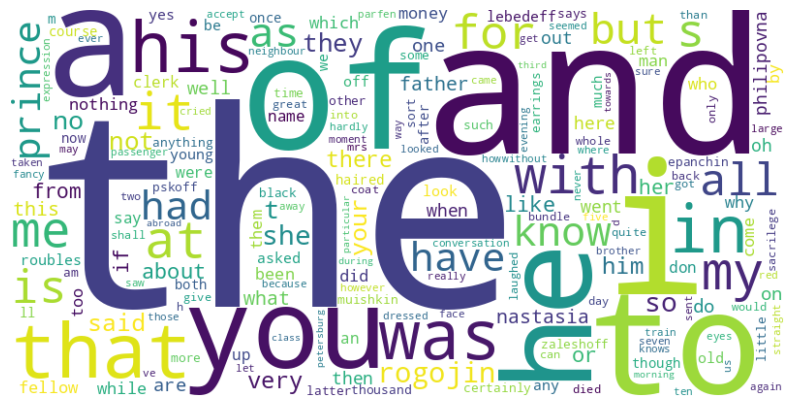

In [115]:
#Ради интереса
def remove_html_tags_and_sequences(text: str) -> str:
    """Удаление HTML-тегов и специфических последовательностей из текста."""

    # Удаление комбинаций HTML-тегов и символов \r и \n
    clean = re.compile('<.*?>|\r|\n')
    return re.sub(clean, '', text)

def generate_wordcloud_from_text(text: str) -> None:
    """
    Генерирует облако слов на основе предоставленного текста.

    Аргументы:
    text (str): Исходный текстовый строка.

    Вывод:
    Отображает облако слов.
    """
    text = remove_html_tags_and_sequences(text)
    # Извлекаем слова из текста
    words = re.findall(r'\w+', text.lower())

    # Считаем частоту каждого слова
    word_counts = Counter(words)

    # Генерируем облако слов
    wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis")
    wordcloud = wc.generate_from_frequencies(word_counts)

    # Отображаем облако слов
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Пример использования, первая глава
text = txt[start:end]
generate_wordcloud_from_text(text)


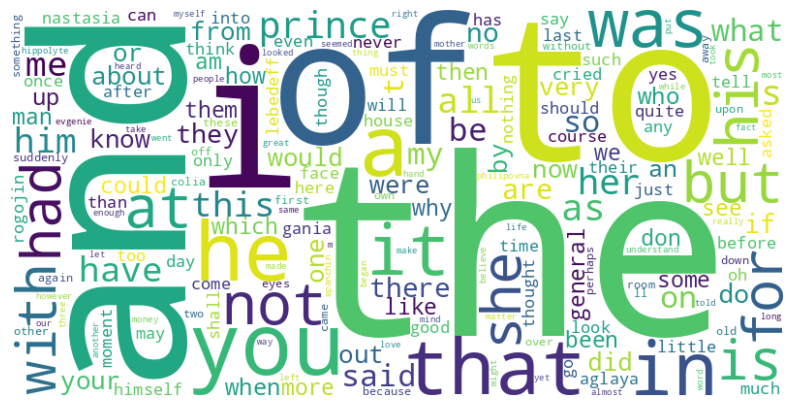

In [114]:
#Для всего текста
generate_wordcloud_from_text(txt)

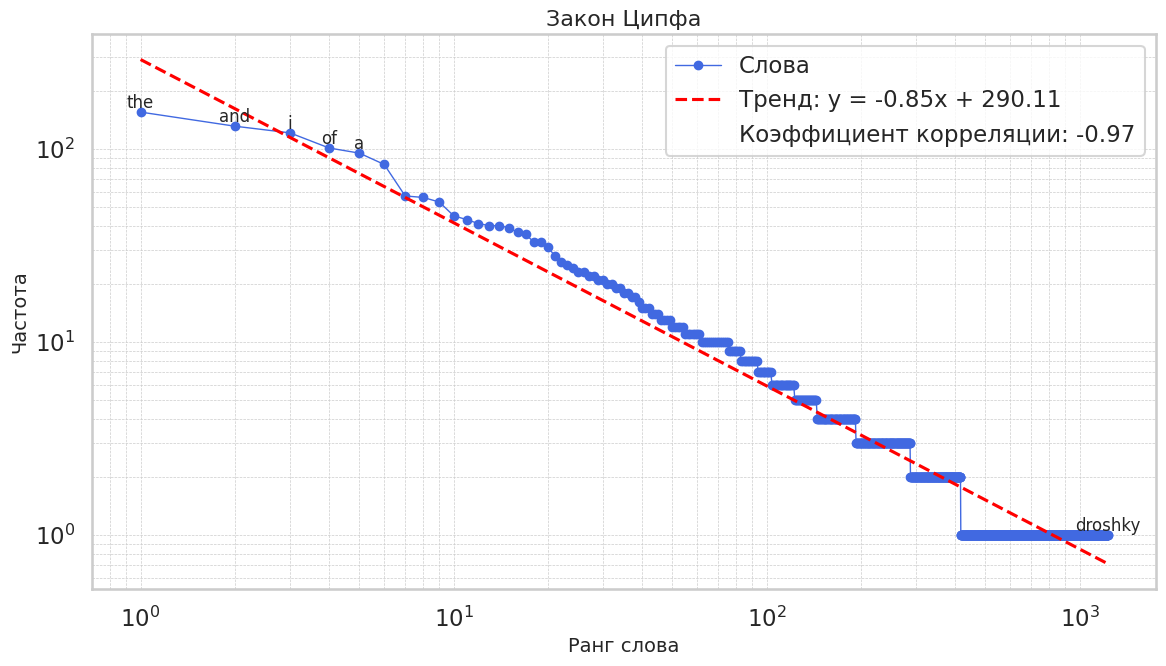

In [120]:
def plot_zipf(txt: str) -> None:
    """
    Функция для визуализации Закона Ципфа на основе предоставленного текста.

    Аргументы:
    txt (str): Текст, для которого будет проведена визуализация.

    Вывод:
    График, демонстрирующий распределение слов в тексте в соответствии с Законом Ципфа.
    """
    txt = remove_html_tags_and_sequences(txt)
    # Очистка текста и извлечение слов
    words = re.findall(r'\w+', txt.lower())

    # Подсчет частоты каждого слова
    word_counts = Counter(words)

    # Сортировка слов по частоте
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    # Построение log-log графика
    ranks = np.arange(1, len(sorted_word_counts) + 1)
    frequencies = np.array([count for _, count in sorted_word_counts])

    # Расчет линии тренда
    slope, intercept, r_value, _, _ = linregress(np.log(ranks), np.log(frequencies))
    line = np.exp(intercept) * ranks**slope

    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 7))
    plt.loglog(ranks, frequencies, marker="o", color="royalblue", linestyle="-", linewidth=1, markersize=6, label="Слова")
    plt.loglog(ranks, line, color="red", linestyle="--", label=f"Тренд: y = {slope:.2f}x + {np.exp(intercept):.2f}")
    plt.plot([], [], ' ', label=f"Коэффициент корреляции: {r_value:.2f}")

    # Добавление самых частых слов и последнего слова на график
    top_words = 5
    for i, (word, count) in enumerate(sorted_word_counts[:top_words]):
        plt.text(i + 1, count, word, fontsize=12, ha='center', va='bottom')

    # Добавление последнего слова на график
    last_word, last_count = sorted_word_counts[-1]
    plt.text(len(sorted_word_counts), last_count, last_word, fontsize=12, ha='center', va='bottom')

    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.title("Закон Ципфа", fontsize=16)
    plt.xlabel("Ранг слова", fontsize=14)
    plt.ylabel("Частота", fontsize=14)
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

# Пример использования для первой главы
plot_zipf(text)


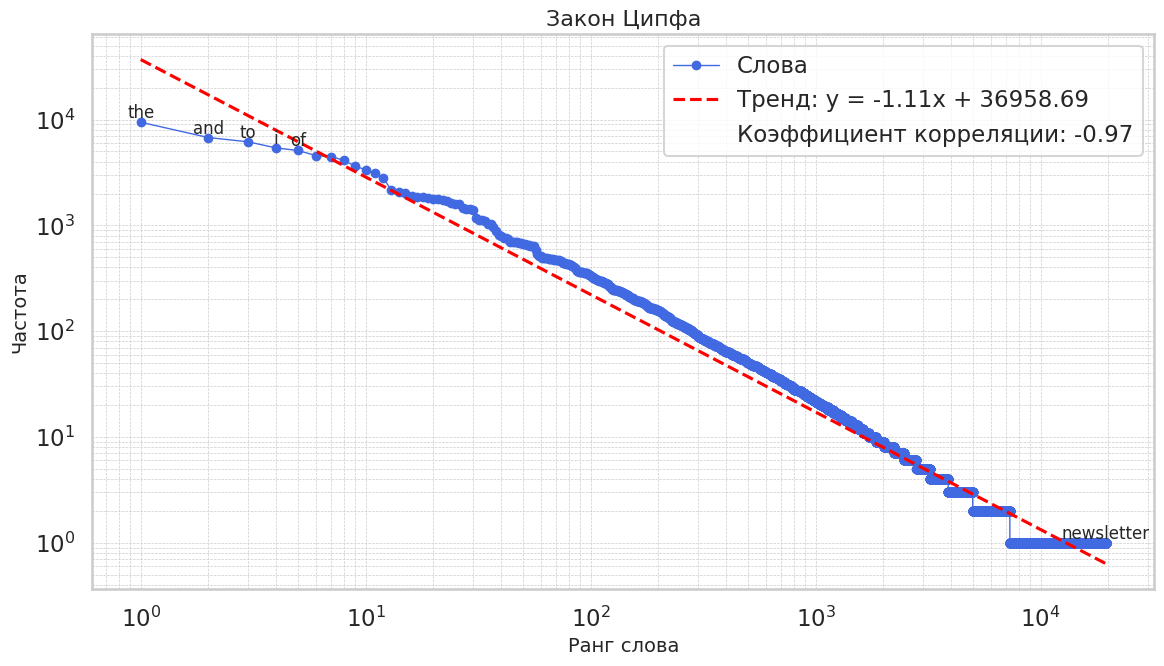

In [121]:
#Для всего текста
plot_zipf(txt)